### 05.XGBoost

In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. Thedescription of the dataset is as follows:

Data Set Information:

Extraction was done by Barry Becker from the 1994 Censusdatabase. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:

    Listing of attributes: >50K, <=50K.

    age: continuous.

    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,Local-gov, State-gov, Without-pay, Never-worked.

    fnlwgt: continuous.

    education: Bachelors, Some-college, 11th, HS-grad, Prof-school,Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,Doctorate, 5th-6th, Preschool.

    education-num: continuous.

    marital-status: Married-civ-spouse, Divorced, Never-married,Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,Unmarried.

    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

    sex: Female, Male.

    capital-gain: continuous.

    capital-loss: continuous.

    hours-per-week: continuous.

    native-country: United-States, Cambodia, England, Puerto-Rico,Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,    Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,    Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

import numpy as np
import pandas as pd

    train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

    test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

    col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']


train_set.columns = col_labels

test_set.columns = col_labels

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [27]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [61]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [29]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [62]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [31]:
test_set.shape, train_set.shape

((16281, 15), (32561, 15))

In [136]:
df = pd.concat([train_set, test_set])

df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

df.shape

(48842, 15)

In [137]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [89]:
df.shape

(48842, 15)

In [92]:
df['wage_class'].value_counts(normalize=True)

<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: wage_class, dtype: float64

In [138]:
df['wage_class'] = np.select([df['wage_class'] == '<=50K.', df['wage_class'] == '>50K.'],
                            ['<=50K',  '>50K'], 
                            default=df['wage_class'])

#df['wage_class'] = df['wage_class'].str.replace('.', '')

In [139]:
df['wage_class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [140]:
#df['wage_class'] = np.select([df['wage_class'] == '<=50K', df['wage_class'] == '>50K'],
#                            [0,  1], 
#                            default=df['wage_class']) 

#df['wage_class'].unique()

In [141]:
#df = df.replace(to_replace=' ?', value='', inplace=True)
#print(df.replace(r'^\*?', np.nan, regex=True))

#d = df.apply(lambda x: np.nan if x=='?')

df = df.replace('?',np.nan)

In [142]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [143]:
df = df.replace(np.nan, '')

In [144]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [145]:
df['wage_class'].value_counts()

<=50K    37155
>50K     11687
Name: wage_class, dtype: int64

In [146]:
from sklearn.utils import resample

print(df['wage_class'].value_counts())
df['wage_class'] = df['wage_class'].str.replace('.', '')

df_majority = df[df['wage_class'] == '<=50K']
df_minority = df[df['wage_class'] == '>50K']

df_majority_downsampled = resample(df_minority, 
                                 replace=True, 
                                 n_samples=37155, 
                                 random_state=123)

df_majority_downsampled.shape
df = pd.concat([df_majority_downsampled, df_majority])

print(df['wage_class'].value_counts())

<=50K    37155
>50K     11687
Name: wage_class, dtype: int64
>50K     37155
<=50K    37155
Name: wage_class, dtype: int64


In [147]:
y = [0, 0, 1, 1, 1, 1, 1, 1, 1]
resample(y, n_samples=15, replace=True, stratify=y,random_state=0)


[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [149]:
y = df['wage_class']
X = df.drop(["wage_class"], axis= 1)

In [150]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [162]:
y = y.replace({'<=50K':0,'>50K':1})

In [163]:
y

14990    1
16107    1
5566     1
21887    1
32228    1
        ..
16275    0
16276    0
16277    0
16278    0
16279    0
Name: wage_class, Length: 74310, dtype: int64

In [151]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [152]:
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [156]:
numerical_cols.dtype

dtype('O')

In [185]:
def univariate_analysis(feature):
    sns.boxplot(x=feature, data=df)
    plt.show()

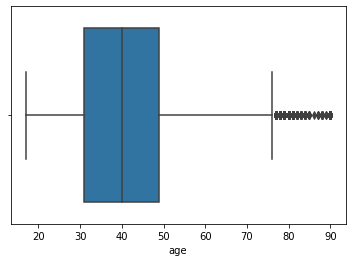

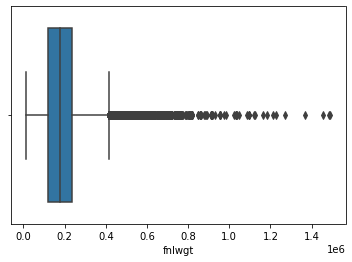

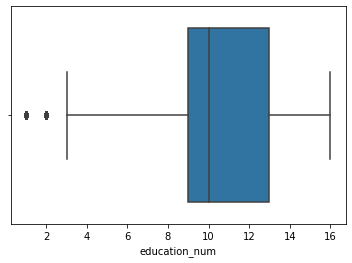

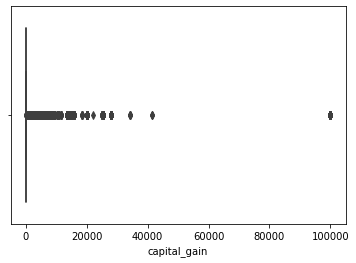

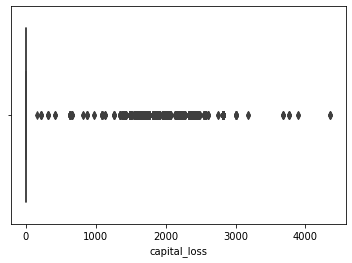

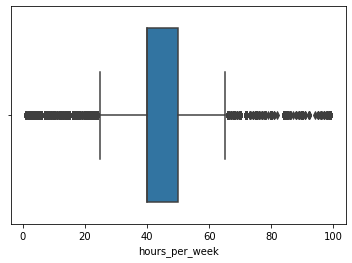

In [186]:
for feature in numerical_cols:
    univariate_analysis(feature=feature)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Self-emp-not-inc'),
  Text(3, 0, 'Local-gov'),
  Text(4, 0, ''),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Federal-gov'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

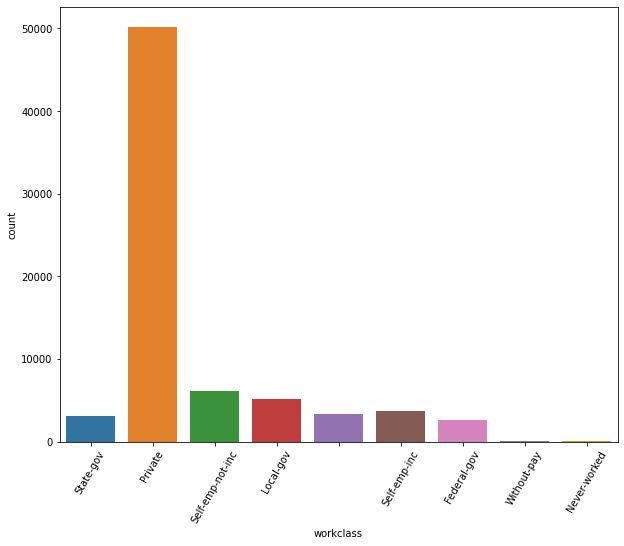

In [180]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

<AxesSubplot:xlabel='wage_class', ylabel='count'>

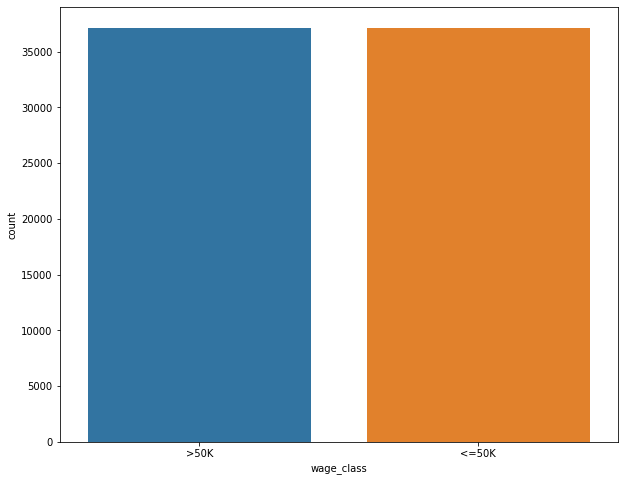

In [178]:
plt.figure(figsize=(10,8))
sns.countplot(df['wage_class'])

In [193]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [195]:
numerical_features = X.select_dtypes(include="number")
categorical_features = X.select_dtypes(include="object")


In [196]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))

In [198]:
workclass_categories = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '', 'Self-emp-inc', 'Without-pay',
       'Never-worked']

education_categories = ['Bachelors', 'HS-grad', '11th', 'Masters', '9th',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', '7th-8th',
       'Doctorate', 'Prof-school', '5th-6th', '10th', '1st-4th',
       'Preschool', '12th']
marital_status_categories = ['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed']
occupation_categories = ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv']

relationship_categories = ['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative']

race_categories = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other']

sex_categories = ['Male', 'Female']

native_country_categories = ['United-States', 'Cuba', 'Jamaica', 'India', '', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
       'Germany', 'Iran', 'Philippines', 'Italy', 'Poland',
       'Columbia', 'Cambodia', 'Thailand', 'Ecuador', 'Laos',
       'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic',
       'El-Salvador', 'France', 'Guatemala', 'China', 'Japan',
       'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland',
       'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong',
       'Ireland', 'Hungary', 'Holand-Netherlands']

In [199]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[workclass_categories,education_categories,marital_status_categories,occupation_categories,relationship_categories,race_categories,sex_categories,native_country_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [202]:
params = [{ 'learning_rate':[0.01,0.001],
                        'max_depth': [3,5,10],
                        'n_estimators':[10,50,100,200]
                    }
                   ]

In [204]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,params,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=3,
             param_grid=[{'learning_rate': [0.01, 0.001],
                          'max_depth': [3, 5, 10],
                          'n_estimators': [10, 50, 100, 200]}],
             scoring='accuracy', verbose=3)

In [205]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [206]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
XBC.score(x_test,y_test)

In [ ]:
y_pred = XBC.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report: {classification_report(y_test,y_pred)}')